# Chipotle EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../input/chipotle/chipotle.tsv', sep = '\t')

In [3]:
df.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


In [4]:
df.shape

(4622, 5)

In [5]:
df.dtypes

order_id               int64
quantity               int64
item_name             object
choice_description    object
item_price            object
dtype: object

In [6]:
df[df.columns[4]] = df[df.columns[4]].replace('[\$,]', '', regex=True).astype(np.float64)

In [7]:
df['revenue'] = df['quantity'] * df['item_price']

In [8]:
df.head()

,order_id,quantity,item_name,choice_description,item_price,revenue
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39,2.39
1,1,1,Izze,[Clementine],3.39,3.39
2,1,1,Nantucket Nectar,[Apple],3.39,3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98,33.96


In [9]:
print('Number of Customers:', df['order_id'].nunique())
print('Number of items on the menu:', df['item_name'].nunique())
print('Items sold: ', df.groupby('order_id')['quantity'].sum().sum())
print('Average order sale: ', df.groupby('order_id')['revenue'].sum().mean())

Number of Customers: 1834
Number of items on the menu: 50
Items sold:  4972
Average order sale:  21.39423118865867


# Visualization

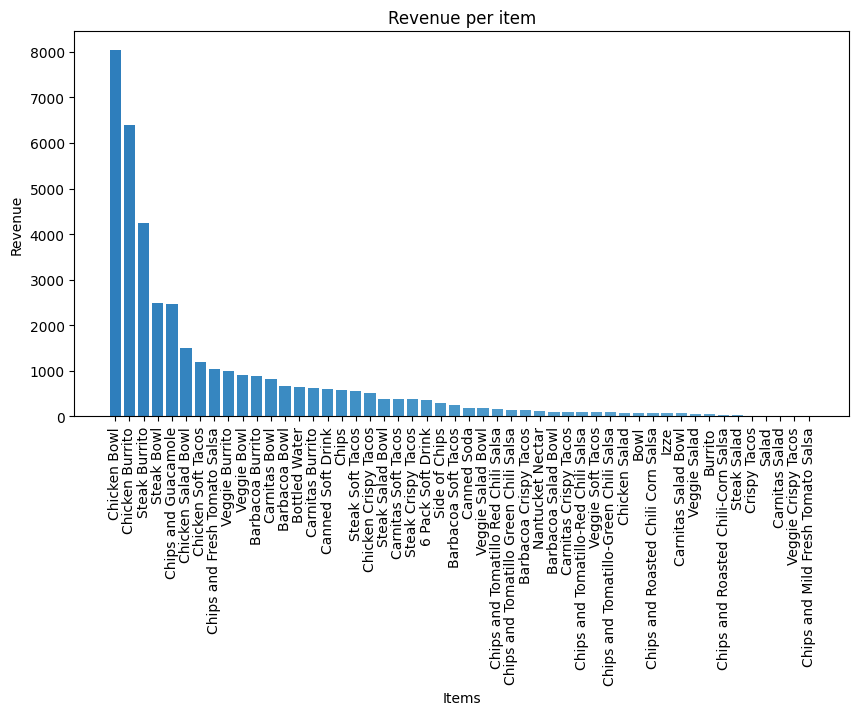

In [10]:
item_revenue = df.groupby('item_name')['revenue'].sum().sort_values(ascending=False)
colors = plt.get_cmap('Blues')(np.linspace(0.7, 0.5, len(item_revenue)))
plt.figure(figsize=(10,5))
plt.bar(item_revenue.index, item_revenue.values, align='center', color=colors)
plt.xlabel('Items')
plt.ylabel('Revenue')
plt.title("Revenue per item")
plt.xticks(rotation=90)
plt.show()

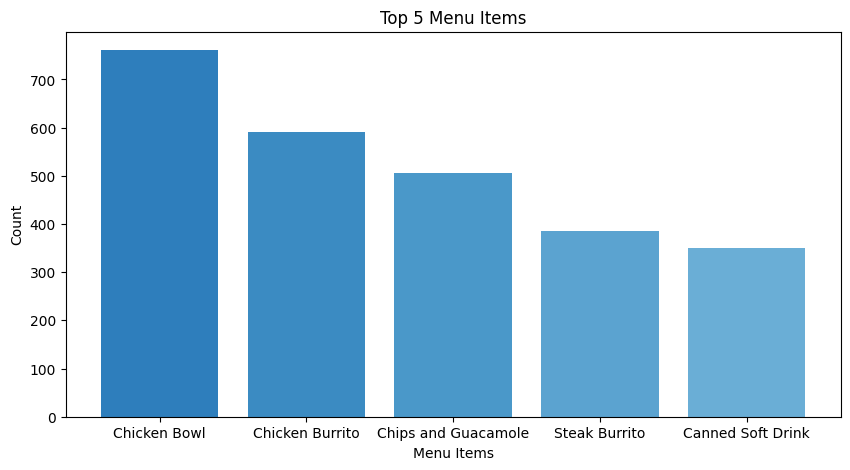

In [11]:
items_quantity = df.groupby('item_name')['quantity'].sum().sort_values(ascending=False).head(5)
colors = plt.get_cmap('Blues')(np.linspace(0.7, 0.5, len(items_quantity)))
plt.figure(figsize=(10,5))
plt.bar(items_quantity.index, items_quantity.values, align='center', color=colors)
plt.title('Top 5 Menu Items')
plt.xlabel('Menu Items')
plt.ylabel('Count')
plt.show()

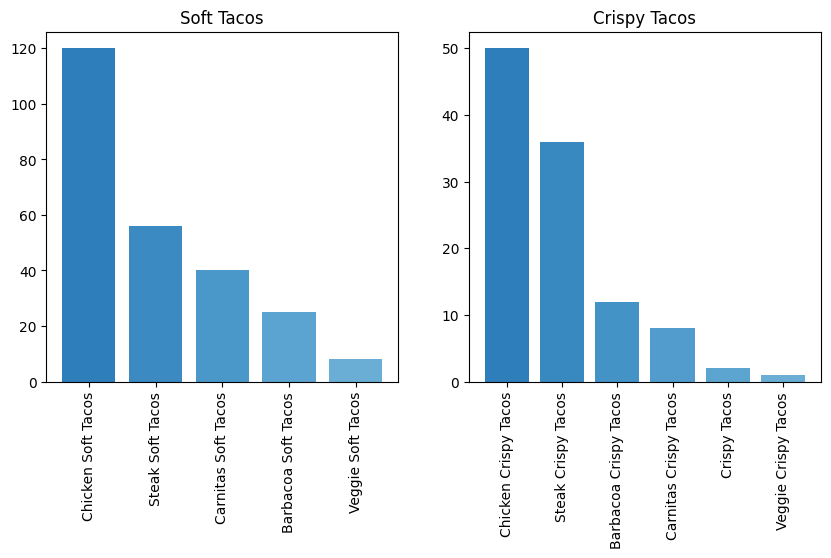

In [12]:
soft_tacos = df.query('item_name in ["Steak Soft Tacos", "Chicken Soft Tacos", "Barbacoa Soft Tacos", "Carnitas Soft Tacos", "Veggie Soft Tacos"]')
crispy_tacos = df.query('item_name in ["Chicken Crispy Tacos", "Steak Crispy Tacos", "Barbacoa Crispy Tacos", "Carnitas Crispy Tacos", "Veggie Crispy Tacos", "Crispy Tacos"]')

soft_tacos_total = soft_tacos.groupby('item_name')['quantity'].sum().sort_values(ascending=False)
crispy_tacos_total = crispy_tacos.groupby('item_name')['quantity'].sum().sort_values(ascending=False)

plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
colors = plt.get_cmap('Blues')(np.linspace(0.7, 0.5, len(soft_tacos_total)))
plt.bar(soft_tacos_total.index, soft_tacos_total.values,color=colors)
plt.title("Soft Tacos")
plt.xticks(rotation=90)

plt.subplot(2,2,2)
colors = plt.get_cmap('Blues')(np.linspace(0.7, 0.5, len(crispy_tacos_total)))
plt.bar(crispy_tacos_total.index, crispy_tacos_total.values, color=colors)
plt.title("Crispy Tacos")
plt.xticks(rotation=90)
plt.show()

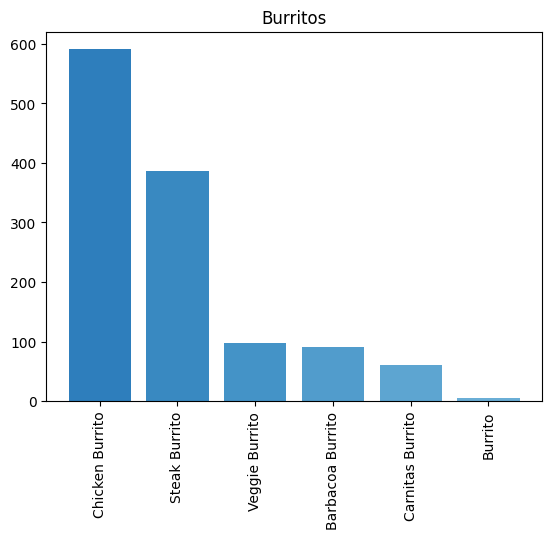

In [13]:
burrito = df.query('item_name in ["Barbacoa Burrito", "Chicken Burrito", "Carnitas Burrito", "Steak Burrito", "Veggie Burrito","Burrito"]')
burritos = burrito.groupby('item_name')['quantity'].sum().sort_values(ascending=False)
colors = plt.get_cmap('Blues')(np.linspace(0.7, 0.5, len(burritos)))
plt.bar(burritos.index, burritos.values, color=colors)
plt.title("Burritos")
plt.xticks(rotation=90)
plt.show()

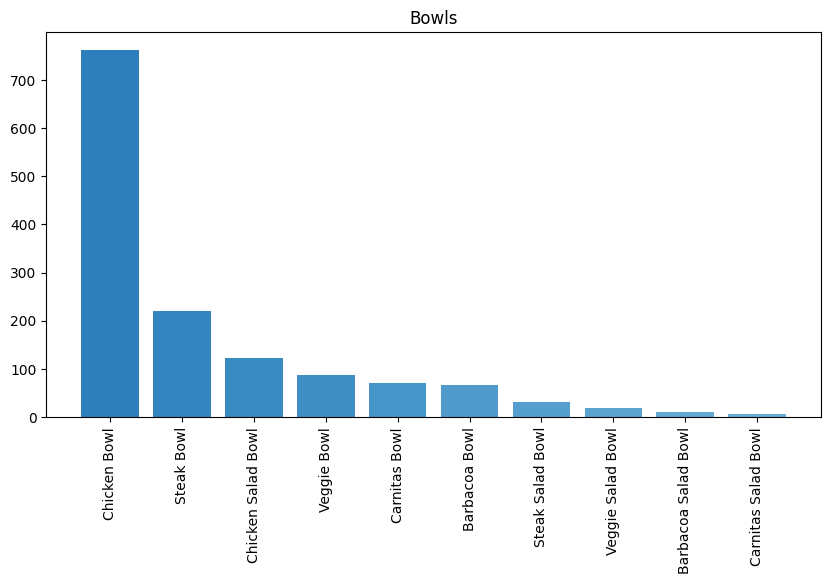

In [14]:
bowl = df.query('item_name in ["Chicken Bowl", "Steak Bowl", "Veggie Bowl", "Chicken Salad Bowl", "Barbacoa Bowl", "Carnitas Bowl", "Veggie Salad Bowl", "Barbacoa Salad Bowl", "Carnitas Salad Bowl", "Steak Salad Bowl"]')
bowls = bowl.groupby('item_name')['quantity'].sum().sort_values(ascending=False)
plt.figure(figsize=(10,5))
colors = plt.get_cmap('Blues')(np.linspace(0.7, 0.5, len(bowls)))
plt.bar(bowls.index, bowls.values, color=colors)
plt.xticks(rotation=90)
plt.title("Bowls")
plt.show()

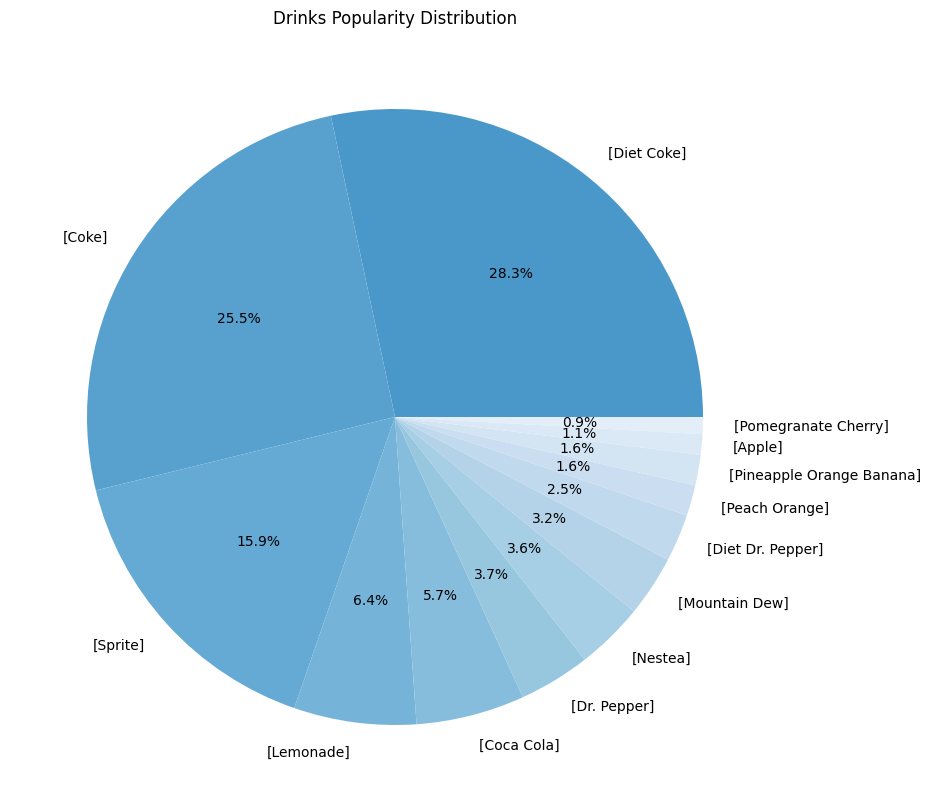

In [15]:
drinks = df.query('item_name in ["6 Pack Soft Drink", "Canned Soft Drink", "Canned Soda", "Nantucket Nectar"]')
drinks = drinks.groupby('choice_description')["quantity"].sum().sort_values(ascending=False)


colors = plt.get_cmap('Blues')(np.linspace(0.6, 0.1, len(drinks)))
plt.figure(figsize=(15,10))
plt.pie(drinks,colors=colors,labels=drinks.index, autopct='%1.1f%%')
plt.title("Drinks Popularity Distribution")
plt.show()